In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

d:\Users\Heijden\Miniconda3\envs\data-analysis\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
datapath = Path().resolve().parents[2] / 'data' / 'market data'
datapath

WindowsPath('D:/Users/Heijden/Documents/PhD work/Current work/DR_IJmuiden/data/market data')

In [3]:
dam = pd.read_pickle(datapath / 'DAM_prices.pkl')
idm = pd.read_pickle(datapath / 'NL_ID.pickle')

In [4]:
dam = dam['NL']

In [5]:
idm = idm['ID3']

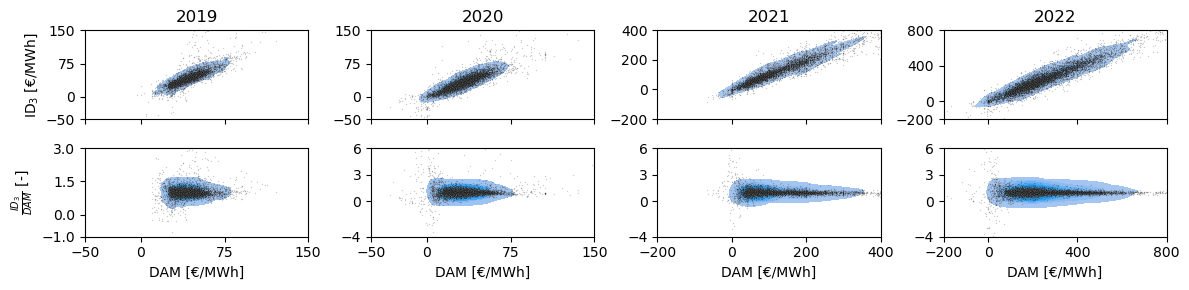

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(12, 3), sharey=False, sharex='col')

bw_0 = 'scott'#0.75
bw_1 = 'scott'#0.75
for i, year in enumerate([2019, 2020, 2021, 2022]):
    dam_ = dam.loc[dam.index.year == year]
    idm_ = idm.loc[idm.index.year == year]
    dam_[dam_==0]=np.nan#0.1
    frac = idm_ / dam_
    frac[abs(frac)>100]=np.nan

    sns.kdeplot(x=dam_, y=idm_, ax=ax[0, i], fill=True, bw_method=bw_0)
    sns.kdeplot(x=dam_, y=frac, ax=ax[1, i], fill=True, bw_method=bw_1)#, bw_method=0.17, levels=10)

    sns.scatterplot(x=dam_, y=idm_, ax=ax[0, i], color='k', alpha=0.2, s=1)
    sns.scatterplot(x=dam_, y=frac, ax=ax[1, i], color='k', alpha=0.2, s=1)

    if year == 2019:
        ax[1, i].set_xlim(-50, 150)
        ax[0, i].set_ylim(-50, 150)
        ax[1, i].set_ylim(-1, 3)

        ax[0, i].set_ylabel(r'ID$_3$ [€/MWh]')
        ax[1, i].set_ylabel(r'$\frac{ID_3}{DAM}$ [-]')

        ax[0,i].set_yticks([-50, 0, 75, 150])
        ax[1,i].set_yticks([-1, 0, 1.5, 3])
        ax[1,i].set_xticks([-50, 0, 75, 150])

        ax[0,i].set_title('2019')
    elif year == 2020:
        ax[1, i].set_xlim(-50, 150)
        ax[0, i].set_ylim(-50, 150)
        ax[1, i].set_ylim(-4, 6)

        ax[0, i].set_ylabel('')

        ax[0,i].set_yticks([-50, 0, 75, 150])
        ax[1,i].set_yticks([-4, 0, 3, 6])
        ax[1,i].set_xticks([-50, 0, 75, 150])

        ax[0,i].set_title('2020')
    elif year == 2021:
        ax[1, i].set_xlim(-200, 400)
        ax[0, i].set_ylim(-200, 400)
        ax[1, i].set_ylim(-4, 6)

        ax[0, i].set_ylabel('')

        ax[0,i].set_yticks([-200, 0, 200, 400])
        ax[1,i].set_yticks([-4, 0, 3, 6])
        ax[1,i].set_xticks([-200, 0, 200, 400])

        ax[0,i].set_title('2021')
    elif year == 2022:
        ax[1, i].set_xlim(-200, 800)
        ax[0, i].set_ylim(-200, 800)
        ax[1, i].set_ylim(-4, 6)

        ax[0, i].set_ylabel('')

        ax[0,i].set_yticks([-200, 0, 400, 800])
        ax[1,i].set_yticks([-4, 0, 3, 6])
        ax[1,i].set_xticks([-200, 0, 400, 800])

        ax[0,i].set_title('2022')

    ax[1,i].set_xlabel(r'DAM [€/MWh]')

fig.tight_layout()
fig.savefig('market_data.pdf', bbox_inches='tight')


In [62]:
dam

2017-12-31 23:00:00+00:00    27.20
2018-01-01 00:00:00+00:00    27.30
2018-01-01 01:00:00+00:00    30.10
2018-01-01 02:00:00+00:00    20.87
2018-01-01 03:00:00+00:00    25.56
                             ...  
2023-01-01 21:45:00+00:00      NaN
2023-01-01 22:00:00+00:00    35.00
2023-01-01 22:15:00+00:00      NaN
2023-01-01 22:30:00+00:00      NaN
2023-01-01 22:45:00+00:00      NaN
Name: NL, Length: 155439, dtype: float64

In [63]:
idm

2015-01-01 00:00:00+01:00      26.3
2015-01-01 01:00:00+01:00     22.88
2015-01-01 02:00:00+01:00      25.0
2015-01-01 03:00:00+01:00      30.0
2015-01-01 04:00:00+01:00     26.68
                              ...  
2023-01-05 19:00:00+01:00    133.94
2023-01-05 20:00:00+01:00    136.31
2023-01-05 21:00:00+01:00    133.47
2023-01-05 22:00:00+01:00    121.63
2023-01-05 23:00:00+01:00    103.33
Freq: H, Name: ID3, Length: 70248, dtype: object